# Midterm #1

**Read the following.** It contains important information about this exam.
 - You must submit your solutions to Canvas **by 4:00 pm!** Please plan accordingly. This gives you approximately 1.5 hours for this exam.
 - There is both a written and computational part to this exam. You will need to download both from Canvas, and submit solutions for both to Canvas.
 - You are allowed to use any reference materials you like for this exam, except each other.
 - You should make an effort to answer all questions on this exam. Clearly identify your final answers, and clearly explain your solutions. This will be graded according to the syllabus rubric, so effort will be heavily weighted.


## Initialization

Collect all your initialization here. Make sure all figures are inlined by using %matplotlib inline.

In [30]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import scipy.linalg as lag
%matplotlib inline

## 1. Debugging

Whenever we perform numerical calculations there are many things that can go wrong. Sometimes they are obvious: the computer complains, and sometimes they are not: the computer gives us an answer but it is incorrect! Here we will explore two examples.

### (a)

As a first example, analytically we know for $\theta=60^\circ$ that $\cos\theta=1/2$. Thus it should be the case that when $\theta=60^\circ$ we should get

$$ \sqrt{1-2\cos\theta} = 0. $$

Numerically if we evaluate this simple expression we are in for a surprise!
Run the following cell.

In [7]:
import numpy as np

print(np.sqrt(1-2*np.cos(np.deg2rad(60))))

print(np.cos(np.deg2rad(60)))
print(1-2*.5000000000000001)

nan
0.5000000000000001
-2.220446049250313e-16


What should have happened is that you get an error and nan is printed. (If this did not happen, then assume it did! This result should not be system dependent, but you never know.)

Clearly explain why this happened and why we always need to be careful of situations like this then when solving problems numerically.

```### Your answer here```

The issue comes down to floating point precision. The answer to the right term under the square root can only be solved to finite precision and in this case it slightly overestimates the value of cosin(60deg). This then becomes slightly more than 1 after multiplying by 2 which when subtracted from 1 yields a negative result. The square root of a negative number is by definition imaginary and probablematic for np.sqrt().

### (b)

When we first discussed root finding we started with an example of finding a square root. Here is one way to proceed. First we import the appropriate module from scipy, give it a short name, and define a function we can use for finding square roots of any number, x0.

In [14]:
import scipy.optimize as opt

def square_root(x, x0=5) :
    return x*x - x0

Now suppose we try to use this to find $\sqrt{5}$. We might try something like the following.

In [16]:
# Initial guess for x, we know the root is between 2 and 3.
x = 2.5
print(square_root(x, 5))
print(square_root(2,5))
print(square_root(3,5))
print("Square root of 5 is", opt.brentq(square_root(x), 2, 2.5))
print("Square root of 5 is", opt.brentq(square_root(x), 2, 3))


1.25
-1
4


TypeError: 'float' object is not callable

This fails! What is wrong? Correct the mistake in the call to opt.brentq to have the correct value of the square root calculated and printed.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## 2. Random Matrices

Random matrix theory was introduced into physics by Eugene Wigner during his study of the quantum mechanical energy spectrum of heavy atoms. He postulated that the spacing between the energy levels of heavy atoms should only depend on the symmetries of the problem. That is, the energy levels of these atoms are well modelled as the eigenvalues of symmetric matrices filled with random values and the distribution of these eigenvalues is independent of the underlying probability distribution from which the elements of the matrix have been chosen. Random matrix theory has been used in many fields and applied to a wide range of problems. In what follows we will test the postulate that the probability distribution for the matrix elements does not change the distribution of eigenvalues.

The predicted probability distribution is the Wigner semicircle distribution given by the probability distribution function

$$ P(x) = \frac{2}{\pi R^2} \sqrt{R^2-x^2}\,, $$

for $x\in[-R,R)$. Here $R$ is the width parameter. The value of $R$ depends on the magnitude of the elements in the random matrix.

We will generate random numbers from two distributions

1. Gaussian with zero mean and unit width, 
2. Uniform distribution on the interval [0,1).

To test the predicted probability distribution we need to generate random symmetric matrices and find their eigenvalues. There are two numpy functions that allow us to do this, `numpy.random.randn` for Gaussian-distributed random numbers, and `np.random.rand` for numbers in the interval [0,1).
These functions can be used to generate random $N\times N$ matrices, but, they will not be symmetric. We can work around this by extracting the symmetric part of a matrix. This can be computed as

$$ \mathsf{A}_{\rm sym} = \frac{1}{2} \left( \mathsf{A} + \mathsf{A}^{\intercal} \right)\,, $$

where $\mathsf{A}^\intercal$ is the matrix transpose. Below, generate a $5\times 5$ matrix using one of these functions. Compute the symmetric part of this matrix, print it, and verify by eye that it does indeed appear symmetric.

In [60]:
# YOUR CODE HERE
A = np.zeros((1000,1000))
for x in range(1000):
    A[x]=np.random.randn()
Asym = 0.5*(A+np.transpose(A))
print(Asym)

[[1.30940913 1.10055342 0.76749359 ... 1.16696854 1.56249772 0.6598017 ]
 [1.10055342 0.89169771 0.55863788 ... 0.95811283 1.35364201 0.45094599]
 [0.76749359 0.55863788 0.22557805 ... 0.625053   1.02058218 0.11788616]
 ...
 [1.16696854 0.95811283 0.625053   ... 1.02452796 1.42005713 0.51736112]
 [1.56249772 1.35364201 1.02058218 ... 1.42005713 1.81558631 0.91289029]
 [0.6598017  0.45094599 0.11788616 ... 0.51736112 0.91289029 0.01019427]]


Now that you have verified the form of this matrix, we will use $N=1000$ and consider Gaussian distributed random matrix entries.

Because this matrix is symmetric, it will have real eigenvalues, however python will not automatically know this. If you use `scipy.linalg.eigvals` to extract the eigenvalues, you will notice it returns complex numbers with a small imaginary piece. You will need to extract the real part of the eigenvalues. There are a number of ways to do so; one way is using the `numpy.real` function.

Generate a (Gaussian) random matrix and extract the real part of the eigenvalues from it. To determine $R$ for the Gaussian distribution, find and print the maximum of the absolute value of the eigenvalues. Make a histogram of the eigenvalues using `matplotlib.pyplot.hist` (remember homework 1 where we have used this before). Include in the plot the expected result from the Wigner semicircle distribution. Keep in mind that the Wigner semicircle distribution is a probability distribution so it is normalized (recall the `density=True` keyword argument you can supply to `hist`). 

Maximum is: 541.1945465742999
Minimum is: -38.1735792711397
Median is: -7.554129800619045e-18


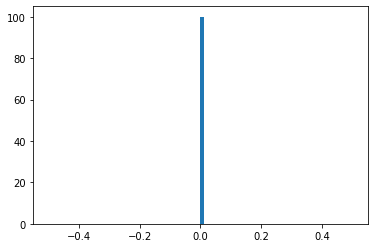

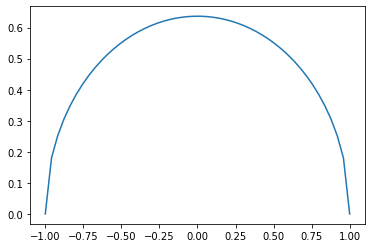

In [78]:
# YOUR CODE HERE
eig = lag.eigvals(Asym)
realEig = np.real(eig)
print("Maximum is:",np.max(realEig))
print("Minimum is:",np.min(realEig))
print("Median is:",np.median(realEig))

def wigner(x):
    return 2.0/np.pi*np.sqrt(1-x**2)
x0=np.linspace(-1,1)
plt.hist(realEig,bins=100,range=(-0.0000000000001,-0.0000000000001),density=True)
plt.show()
plt.plot(x0,wigner(x0))

We now want to repeat the same steps but for a matrix with elements drawn from the uniform distribution. Again calculate the eigenvalues from a random matrix, print the value of $R$, and make a histogram of the eigenvalues.

[[0.08339561 0.53973234 0.46303241 ... 0.44504459 0.24506299 0.28767613]
 [0.53973234 0.99606908 0.91936915 ... 0.90138132 0.70139973 0.74401286]
 [0.46303241 0.91936915 0.84266921 ... 0.82468139 0.62469979 0.66731293]
 ...
 [0.44504459 0.90138132 0.82468139 ... 0.80669357 0.60671197 0.6493251 ]
 [0.24506299 0.70139973 0.62469979 ... 0.60671197 0.40673038 0.44934351]
 [0.28767613 0.74401286 0.66731293 ... 0.6493251  0.44934351 0.49195664]]
Maximum is: 541.1945465742999


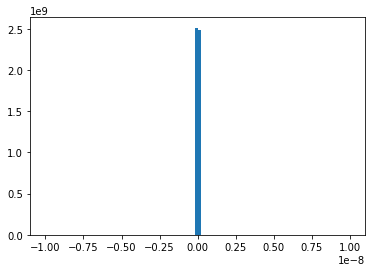

In [74]:
# YOUR CODE HERE
A = np.zeros((1000,1000))
for x in range(1000):
    A[x]=np.random.rand()
Asym = 0.5*(A+np.transpose(A))
print(Asym)
# YOUR CODE HERE
eig = lag.eigvals(Asym)
realEig = np.real(eig)
print("Maximum is:",np.max(realEig))

plt.hist(realEig,bins=100,range=(-0.00000001,0.00000001),density=True)
plt.show()

You should have found that $R$ was quite large, but when you look at the histogram you find that there are almost no eigenvalues at such a large value. This is a property of the uniform distribution, it introduces spurious large eigenvalues. We can easily remove these using array slicing. Repeat the previous part (you may use the same eigenvalues as calculated above) but now use array slicing to remove the large eigenvalues. Compute the new value of $R$ for this distribution. Include in the plot the expected result from the Wigner semicircle distribution.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Turn in the Exam

Turn in the exam on Canvas following the procedure used for the labs and homework.